# How to read and plot GBM Earth occultation text files

Load numpy and matplotlib into the interactive name space so they can be easily used

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 1. Download ASCII file VELAX-1_GBM_occ_fluxhist_auto.txt from GBM Earth Occultation website https://gammaray.nsstc.nasa.gov/gbm/science/earth_occ.html

### 2. Examine txt file header

In [5]:
%system more VELAX-1_GBM_occ_fluxhist_auto.txt


['::::::::::::::',
 'VELAX-1_GBM_occ_fluxhist_auto.txt',
 '::::::::::::::',
 'Name: VELAX-1                  RA:      135.529 Dec:      -40.5550',
 'Caveats: ',
 '1. These data are preliminary. Contact colleen.wilson@nasa.gov before including in detailed analyses.',
 '2. Sources in the galactic center region suffer from significant source confusion. Use with caution.',
 '3. Periodicities near 50-55 days are most likely instrumental, due to the Fermi spacecraft orbital precession period.',
 '4. Negative flux values are likely indicative of source interference or background problems.',
 'All fluxes are in mcrab units',
 'Columns: tstart, tstop (MJD), flux, fluxerr (12-25), flux, fluxerr (25-50), flux, fluxerr (50-100), flux, fluxerr (100-300), number of occultation steps',
 'Long-term average: 55966.027383  57889.999437  268.134491  0.921521  205.550186  1.524528  23.138550  2.280292  -6.144810  3.508579  29988',
 '55966.027383  55968.016861  276.978455  22.061926  254.340744  37.193157 

### 3. Read txt file

In [6]:
filename = 'VELAX-1_GBM_occ_fluxhist_auto.txt'
tstart, tstop, flux1, err1, flux2, err2, flux3, err3, flux4, err4, nocc = loadtxt(filename, unpack=True,skiprows=9)

### 4. Compute mission long average fluxes

In [7]:
avg1 = sum(flux1/err1**2)/sum(1.0/err1**2)
avg2 = sum(flux2/err2**2)/sum(1.0/err2**2)
avg3 = sum(flux3/err3**2)/sum(1.0/err3**2)
avg4 = sum(flux4/err4**2)/sum(1.0/err4**2)

### 5. Plot the 4 energy bands in the file

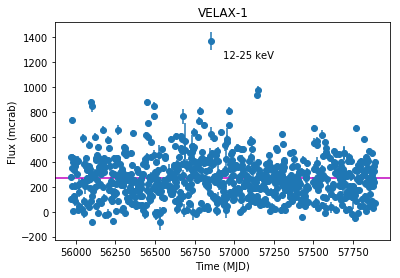

In [8]:
tmid=(tstart+tstop)/2.
plt.errorbar(tmid,flux1,err1,fmt='o')
plt.ylabel('Flux (mcrab)')
plt.xlabel('Time (MJD)')
plt.title('VELAX-1')
plt.axhline(y=avg1, xmin=0, xmax=1,color='m')
plt.text((min(tmid)+max(tmid))/2.,0.9*max(flux1),'12-25 keV')

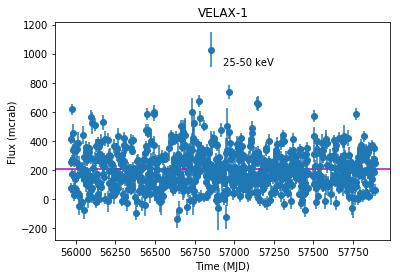

In [6]:
plt.errorbar(tmid,flux2,err2,fmt='o')
plt.ylabel('Flux (mcrab)')
plt.xlabel('Time (MJD)')
plt.title('VELAX-1')
plt.axhline(y=avg2, xmin=0, xmax=1,color='m')
plt.text((min(tmid)+max(tmid))/2.,0.9*max(flux2),'25-50 keV')

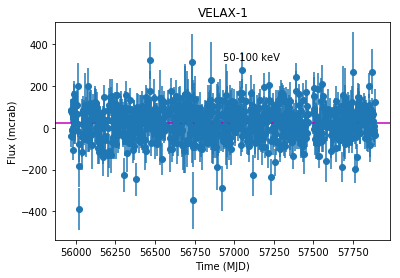

In [9]:
plt.errorbar(tmid,flux3,err3,fmt='o')
plt.ylabel('Flux (mcrab)')
plt.xlabel('Time (MJD)')
plt.title('VELAX-1')
plt.axhline(y=avg3, xmin=0, xmax=1,color='m')
plt.text((min(tmid)+max(tmid))/2.,max(flux3),'50-100 keV')

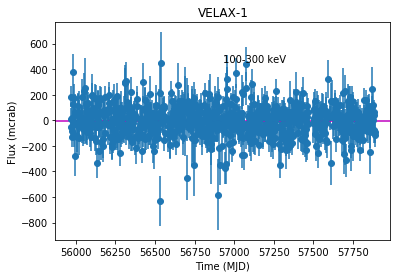

In [10]:
plt.errorbar(tmid,flux4,err4,fmt='o')
plt.ylabel('Flux (mcrab)')
plt.xlabel('Time (MJD)')
plt.title('VELAX-1')
plt.axhline(y=avg4, xmin=0, xmax=1,color='m')
plt.text((min(tmid)+max(tmid))/2.,max(flux4),'100-300 keV')

### 6. A simple python tool for plotting these text files can be downloaded from the GBM Earth Occultation website https://gammaray.nsstc.nasa.gov/gbm/science/earth_occ.html

['plot_occ_txt_files.py', 'VELAX-1_GBM_occ_fluxhist_auto.txt', '56000', '56500']
55967.022122 57889.028323 -85.040466 1364.95874


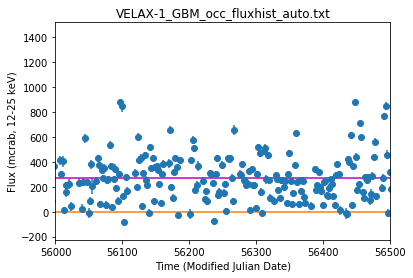

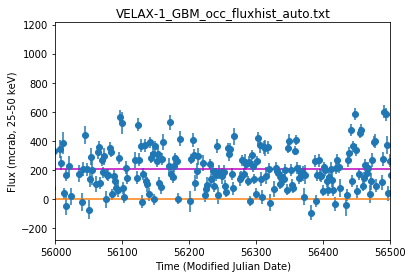

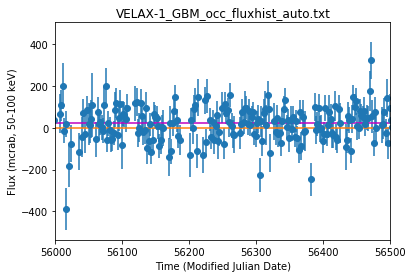

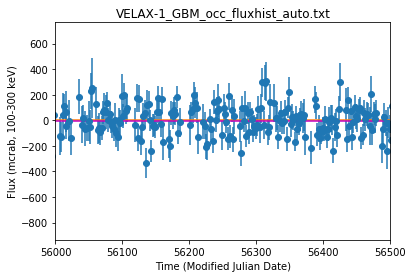

In [11]:
run plot_occ_txt_files.py 'VELAX-1_GBM_occ_fluxhist_auto.txt' 56000 56500